# General Analysis of Suicide Rates

The aim is to make general analysis of suicide rates.


* Dataset : https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
* Note: This project not finished yet.

# Content
1. Load and Check Data
1. Variable Description
1. Basic Data Analysis
1. Question

# 1) Load and Check Data

In [1]:
import findspark

import pandas
findspark.init("C:\spark")
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf 
from pyspark import SparkContext 

spark=SparkSession.builder \
    .master("local") \
    .appName("SuicideAnalysis") \
    .getOrCreate()

sc = spark.sparkContext
sc

<SparkContext master=local appName=SuicideAnalysis>

In [2]:
suicide = spark.read.csv("master.csv",header=True,inferSchema=True,sep=",")
suicide.cache()

DataFrame[country: string, year: int, sex: string, age: string, suicides_no: int, population: int, suicides/100k pop: double, country-year: string, HDI for year: double,  gdp_for_year ($) : string, gdp_per_capita ($): int, generation: string]

In [3]:
#show first 10 data
suicide.show(10)

+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+------------------+------------------+---------------+
|country|year|   sex|        age|suicides_no|population|suicides/100k pop|country-year|HDI for year| gdp_for_year ($) |gdp_per_capita ($)|     generation|
+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+------------------+------------------+---------------+
|Albania|1987|  male|15-24 years|         21|    312900|             6.71| Albania1987|        null|     2,156,624,900|               796|   Generation X|
|Albania|1987|  male|35-54 years|         16|    308000|             5.19| Albania1987|        null|     2,156,624,900|               796|         Silent|
|Albania|1987|female|15-24 years|         14|    289700|             4.83| Albania1987|        null|     2,156,624,900|               796|   Generation X|
|Albania|1987|  male|  75+ years|          1|     21800|             4

In [4]:
# renaming column name, I did this because there may be problems for future analysis.
suicide=(suicide   
        .withColumnRenamed('country','Country')
        .withColumnRenamed('year', 'Year')
        .withColumnRenamed('sex','Sex')
        .withColumnRenamed('age','Age')
        .withColumnRenamed('suicides_no','SuicidesNo')
        .withColumnRenamed('population','Population')
        .withColumnRenamed('suicides/100k pop','Suicides100kPop')
        .withColumnRenamed('country-year','CountryYear')
        .withColumnRenamed('HDI for year','HDIForYear')
        .withColumnRenamed(' gdp_for_year ($) ','GdpForYear')
         .withColumnRenamed('gdp_per_capita ($)','GdpPerCapita')
        .withColumnRenamed('generation','Generation'))


In [5]:
suicide.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SuicidesNo: integer (nullable = true)
 |-- Population: integer (nullable = true)
 |-- Suicides100kPop: double (nullable = true)
 |-- CountryYear: string (nullable = true)
 |-- HDIForYear: double (nullable = true)
 |-- GdpForYear: string (nullable = true)
 |-- GdpPerCapita: integer (nullable = true)
 |-- Generation: string (nullable = true)



In [6]:
suicide.summary().show()

+-------+----------+------------------+------+-----------+------------------+------------------+------------------+--------------+-------------------+-----------------+------------------+----------+
|summary|   Country|              Year|   Sex|        Age|        SuicidesNo|        Population|   Suicides100kPop|   CountryYear|         HDIForYear|       GdpForYear|      GdpPerCapita|Generation|
+-------+----------+------------------+------+-----------+------------------+------------------+------------------+--------------+-------------------+-----------------+------------------+----------+
|  count|     27820|             27820| 27820|      27820|             27820|             27820|             27820|         27820|               8364|            27820|             27820|     27820|
|   mean|      null|2001.2583752695903|  null|       null|242.57440690150972|1844793.6173975556|12.816097411933894|          null| 0.7766011477761785|             null|16866.464414090584|      null|
| std

# 2) Variable Description
1. Country
1. Year
1. Sex
1. Age
1. SuicidesNo
1. Population
1. Suicides100kPop
1. CountryYear
1. HDIForYear ** Human Developing index
1. GdpForYear ** Gross Domestic Product (Money)
1. GdpPerCapita ** Gross Domestic Product per person(Money)
1. Generation

In [7]:
suicide.printSchema()
#it shows the schema of suicide

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SuicidesNo: integer (nullable = true)
 |-- Population: integer (nullable = true)
 |-- Suicides100kPop: double (nullable = true)
 |-- CountryYear: string (nullable = true)
 |-- HDIForYear: double (nullable = true)
 |-- GdpForYear: string (nullable = true)
 |-- GdpPerCapita: integer (nullable = true)
 |-- Generation: string (nullable = true)



##### We understand that there is no null data except "HDI for year"
* float64(2): Suicides100kPop, HDIForYear
* int64(4): Year,SuicidesNo,Population,GdpPerCapita
* object(6): Country,Sex,Age,CountryYear,GdpForYear,Generation

## 3) Basic Data Analysis
* Categorical Variable: Country, Year, Sex, CountryYear, Generation
* Numerical Variable: Age, SuicidesNo, Population, Suicides100kPop, HDIForYear, GdpForYear, GdpPerCapita

### a) Mean of suicide according to Age and Sex

In [8]:
a=suicide.drop('HDIForYear','GdpPerCapita','Population','Year','Suicides100kPop')
a.groupby("Age","Sex").mean().show()


+-----------+------+------------------+
|        Age|   Sex|   avg(SuicidesNo)|
+-----------+------+------------------+
|15-24 years|  male|272.77251184834125|
|  75+ years|  male|185.75355450236967|
|35-54 years|female|218.10986643688065|
|35-54 years|  male| 838.3920723825937|
|25-34 years|female| 89.97113313227057|
|55-74 years|  male| 529.2576475657045|
|55-74 years|female|185.28048255062473|
|15-24 years|female| 75.58681602757432|
|  75+ years|female| 95.64153382162861|
|25-34 years|  male| 394.2649719948298|
| 5-14 years|female|7.3739696312364424|
| 5-14 years|  male|15.300216919739697|
+-----------+------+------------------+



* As you can see,the rate for the age group 5-14 is very low, but for the age group 35-54 it is very high.
* **Gördüğünüz gibi 5-14 yaş ortalamasında intihar oranı çok düşük, ama 35-54 yaş grubu için bu oran çok yüksek.**




* It is observed from this table that men are more likely to commit suicide than women.
* **Bu Tablodan erkeklerin kadınlara göre daha çok intihara meyilli olduğu gözlenmektedir.**


### b)Total suicide by Year

In [9]:
b=suicide.drop('Suicides100kPop','HDIForYear','GdpPerCapita','Population')
b.groupby("Year").sum("SuicidesNo").orderBy("Year").show(50)

#nyytotal=b.iloc[:15]
#tyytotal=b.iloc[15:]


+----+---------------+
|Year|sum(SuicidesNo)|
+----+---------------+
|1985|         116063|
|1986|         120670|
|1987|         126842|
|1988|         121026|
|1989|         160244|
|1990|         193361|
|1991|         198020|
|1992|         211473|
|1993|         221565|
|1994|         232063|
|1995|         243544|
|1996|         246725|
|1997|         240745|
|1998|         249591|
|1999|         256119|
|2000|         255832|
|2001|         250652|
|2002|         256095|
|2003|         256079|
|2004|         240861|
|2005|         234375|
|2006|         233361|
|2007|         233408|
|2008|         235447|
|2009|         243487|
|2010|         238702|
|2011|         236484|
|2012|         230160|
|2013|         223199|
|2014|         222984|
|2015|         203640|
|2016|          15603|
+----+---------------+



In [10]:
nyytotal=b.filter(b.Year < 2000).groupby("Year").sum("SuicidesNo")
tyytotal=b.filter(b.Year >= 2000).groupby("Year").sum("SuicidesNo")

In [11]:


print("Before 2000s Total Suicide: 2938051")
nyytotal.agg({'sum(SuicidesNo)':'sum'}).show()
print("After 2000s Total Suicide : 3810369")
tyytotal.agg({'sum(SuicidesNo)':'sum'}).show()

Before 2000s Total Suicide: 2938051
+--------------------+
|sum(sum(SuicidesNo))|
+--------------------+
|             2938051|
+--------------------+

After 2000s Total Suicide : 3810369
+--------------------+
|sum(sum(SuicidesNo))|
+--------------------+
|             3810369|
+--------------------+



* As we can see from the results, the number of suicides has increased after the 2000s.
* **Sonuçlardan gördüğümüz üzere 2000'lerden sonra intihar sayıları artmış.**

In [12]:
# 2016  en düşük intihar sayısına sahip yıldır
# Year 2016 has the lowest number of suicides.
c=suicide.drop('Suicides100kPop','HDIForYear','GdpPerCapita','Population')
c=c.groupby("Year").sum("SuicidesNo").orderBy("sum(SuicidesNo)")
c.show()

+----+---------------+
|Year|sum(SuicidesNo)|
+----+---------------+
|2016|          15603|
|1985|         116063|
|1986|         120670|
|1988|         121026|
|1987|         126842|
|1989|         160244|
|1990|         193361|
|1991|         198020|
|2015|         203640|
|1992|         211473|
|1993|         221565|
|2014|         222984|
|2013|         223199|
|2012|         230160|
|1994|         232063|
|2006|         233361|
|2007|         233408|
|2005|         234375|
|2008|         235447|
|2011|         236484|
+----+---------------+
only showing top 20 rows



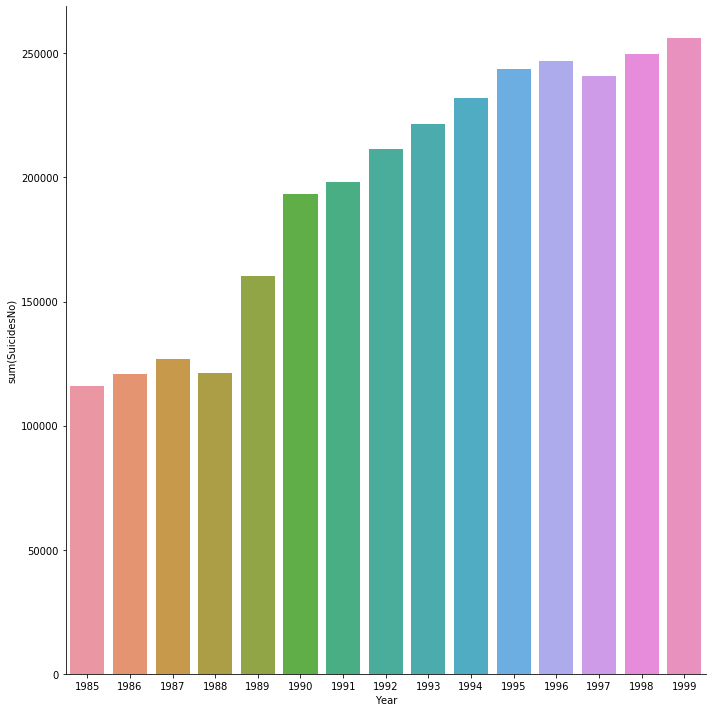

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df_nyytotal=nyytotal.toPandas()
df_nyytotal=df_nyytotal.reset_index()
yearsuicide=sns.factorplot(data=df_nyytotal,x="Year",y="sum(SuicidesNo)",kind="bar",size=10)
plt.show()

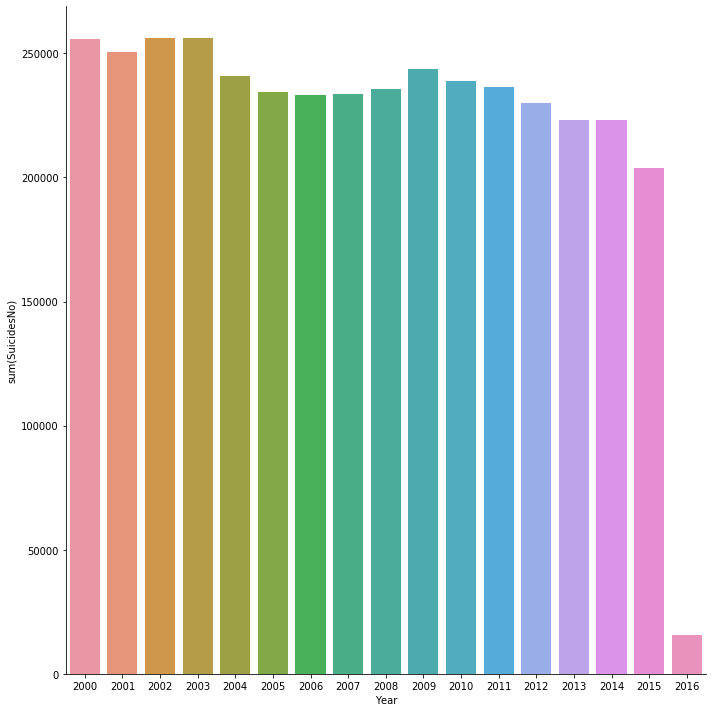

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df_tyytotal=tyytotal.toPandas()
df_tyytotal=df_tyytotal.reset_index()
yearsuicide=sns.factorplot(data=df_tyytotal,x="Year",y="sum(SuicidesNo)",kind="bar",size=10)
plt.show()

* Probably our data set has no all data about 2016 that's why 2016 has lowest number
* After 2009 Total suicide has started to decrease
* Suicide rate steadily increased until 2001

### c) Total Suicide according to Year and Sex
#### Female

In [15]:
female=suicide.drop('Suicides100kPop','HDIForYear','GdpPerCapita','Population')
female=female.filter(female.Sex.like('female')).groupby("Year").sum("SuicidesNo")
femalebefore=female.filter(female.Year < 2000)
femaleafter=female.filter(female.Year >= 2000)

In [16]:
print("For Female Total suicide Before the 2000's: 704942")
femalebefore.agg({'sum(SuicidesNo)':'sum'}).show()
print("For Female Total suicide After the 2000's: 854568")
femaleafter.agg({'sum(SuicidesNo)':'sum'}).show()

For Female Total suicide Before the 2000's: 704942
+--------------------+
|sum(sum(SuicidesNo))|
+--------------------+
|              704942|
+--------------------+

For Female Total suicide After the 2000's: 854568
+--------------------+
|sum(sum(SuicidesNo))|
+--------------------+
|              854568|
+--------------------+



#### Male

In [17]:
male=suicide.drop('Suicides100kPop','HDIForYear','GdpPerCapita','Population')
male=male.filter(male.Sex.like('male')).groupby("Year").sum("SuicidesNo")
malebefore=male.filter(male.Year < 2000)
maleafter=male.filter(male.Year >= 2000)

In [18]:
print("For Male Total suicide Before the 2000's: 2233109")
malebefore.agg({'sum(SuicidesNo)':'sum'}).show()
print("For Male Total suicide After the 2000's: 2955801")
maleafter.agg({'sum(SuicidesNo)':'sum'}).show()

For Male Total suicide Before the 2000's: 2233109
+--------------------+
|sum(sum(SuicidesNo))|
+--------------------+
|             2233109|
+--------------------+

For Male Total suicide After the 2000's: 2955801
+--------------------+
|sum(sum(SuicidesNo))|
+--------------------+
|             2955801|
+--------------------+



### d) Mean of the Country suicide ratios

* First 15 country that has big ratio for suicide

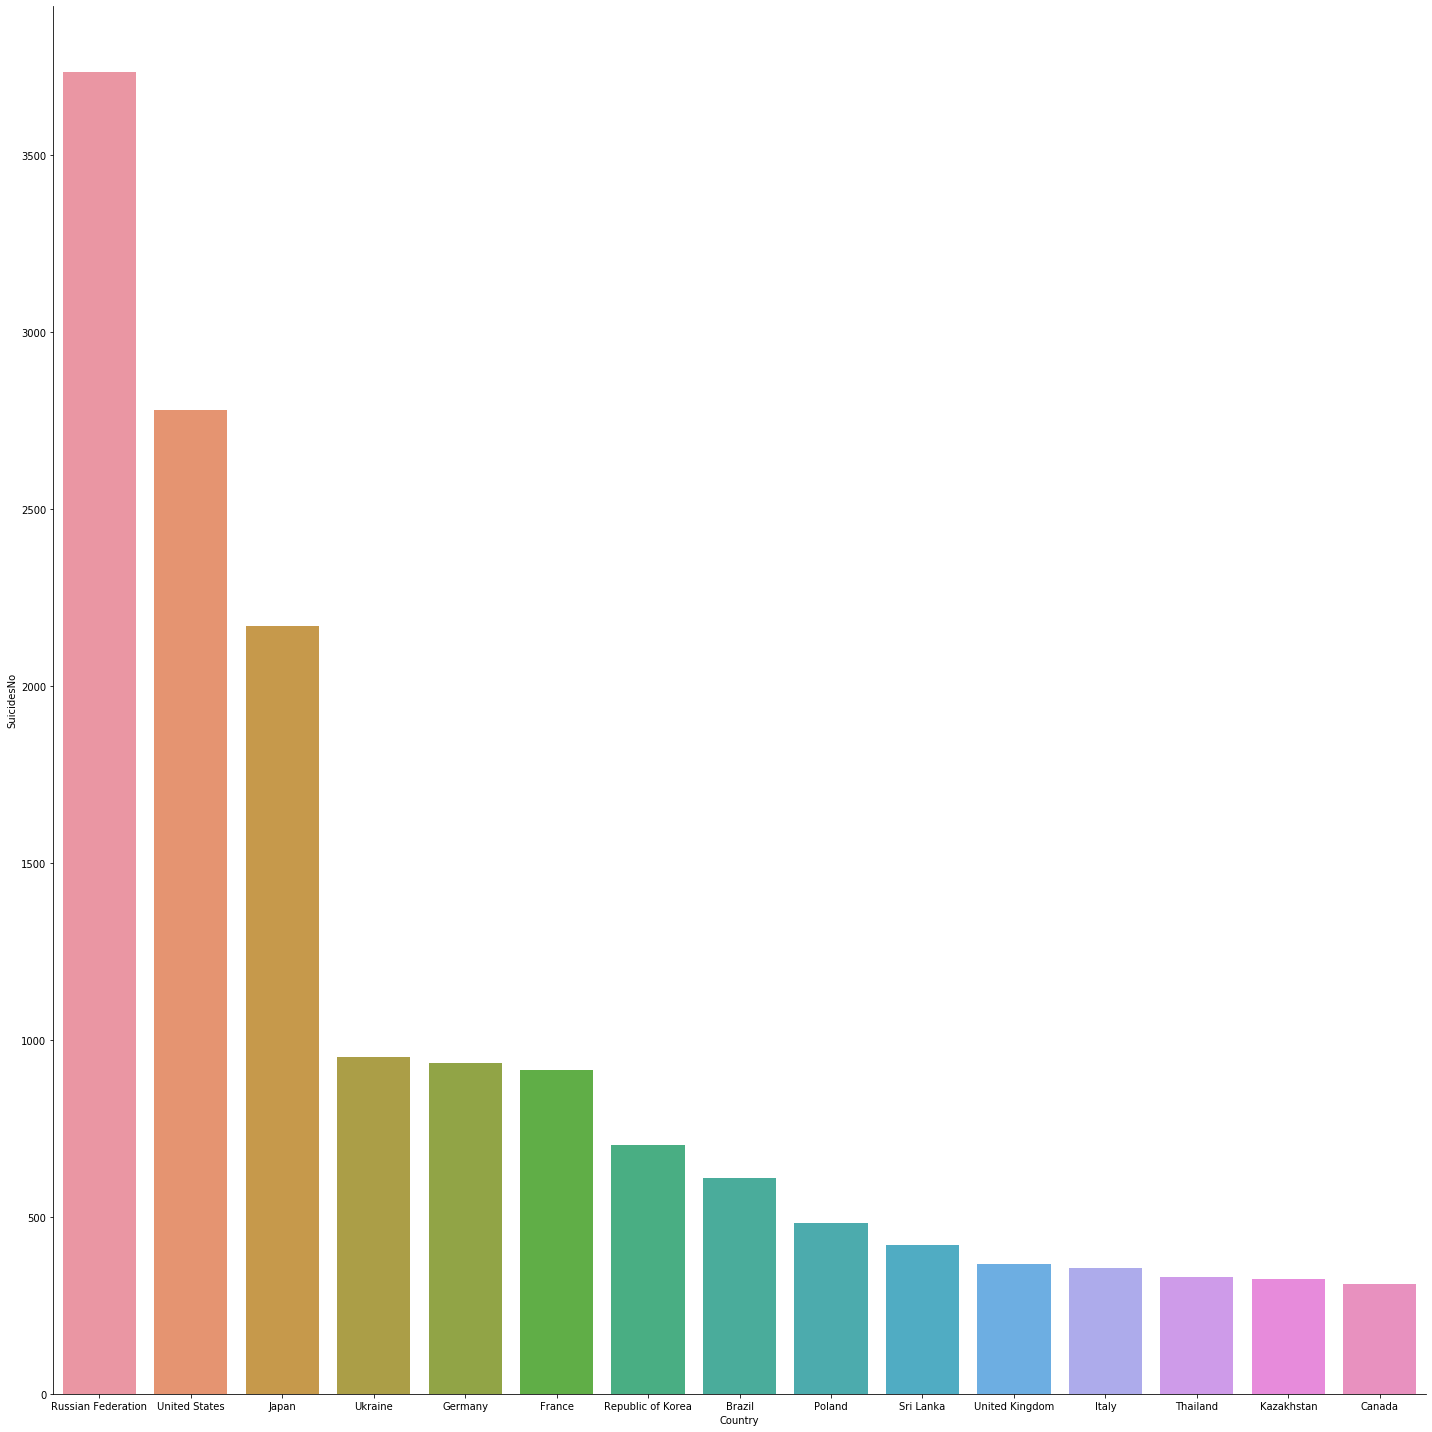

In [19]:
df=suicide.toPandas()
df=df.reset_index()

meancountry=df.groupby(by="Country").mean().sort_values(by="SuicidesNo" ,ascending=False)
meancountry=meancountry.reset_index().head(15)
sn=sns.factorplot(data=meancountry,x="Country",y="SuicidesNo",kind="bar",size=20)
plt.show()

## Question
#### Which country has big number for female suicide?
##### Hangi ülke en yüksek kadın intihar sayısına sahiptir

In [20]:
question=suicide.drop('Suicides100kPop','HDIForYear','GdpPerCapita','Population')
question=question.filter(question.Sex.like('female')).groupby("Country").sum()
quesstion=question.toPandas()
#d=df[(df["Sex"] == "female")].groupby(by="Country").sum()
#d=d.drop(['Suicides100kPop','HDIForYear','GdpPerCapita','Population','Year'],axis=1)
#question=d.groupby(by="Country").mean().sort_values(by="SuicidesNo" ,ascending=False)

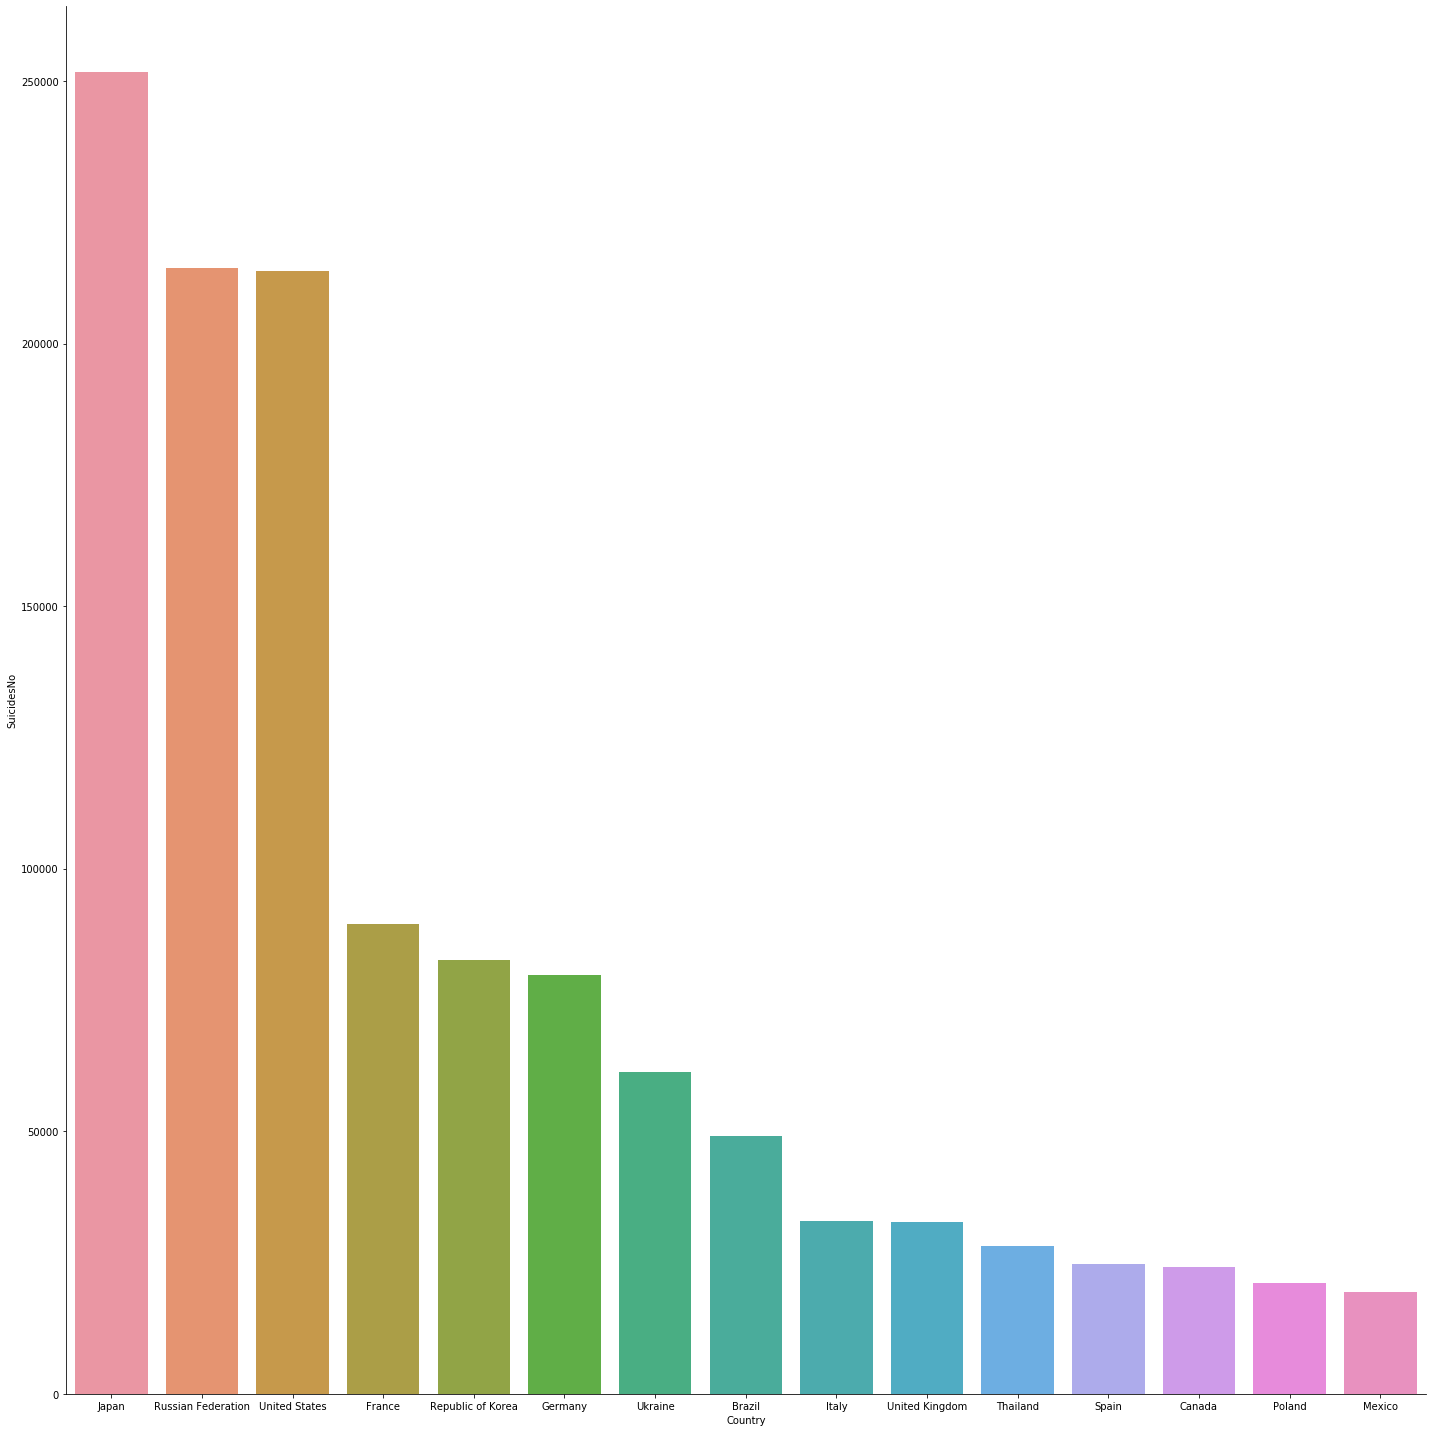

In [21]:
d=question.toPandas()
d=df[(df["Sex"] == "female")].groupby(by="Country").sum()
d=d.drop(['Suicides100kPop','HDIForYear','GdpPerCapita','Population','Year'],axis=1)
question=d.groupby(by="Country").mean().sort_values(by="SuicidesNo" ,ascending=False)
question=question.reset_index().head(15)
sn=sns.factorplot(data=question,x="Country",y="SuicidesNo",kind="bar",size=20)
plt.show()

